In [231]:
import numpy as np
import pandas as pd
import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import plotly.express as px
from datetime import datetime,date

%matplotlib inline
init_notebook_mode(connected=True)
cf.set_config_file(sharing='private',theme='pearl',offline=True)
#print("Cufflinks Version : {}".format(cf.__version__))

df = pd.read_csv('./data/btc-usd-max.csv',index_col=0,parse_dates=True )
df.drop(["market_cap", "total_volume"], axis=1, inplace=True)
df = df.resample('D').first()
df['price'].fillna(method='ffill', inplace=True)
# to get the log price
# df['price'] = np.log(df['price'])
df.head()

,price
snapped_at,
2013-04-28 00:00:00+00:00,135.30
2013-04-29 00:00:00+00:00,141.96
2013-04-30 00:00:00+00:00,135.30
2013-05-01 00:00:00+00:00,117.00
2013-05-02 00:00:00+00:00,103.43


In [232]:
# help(df.iplot) #to get help with all the settings


In [233]:
# df.iplot(rangeslider = True, fill=True, logy=True)
df.iplot(rangeslider = True, fill=True)

In [234]:
train_data = df.iloc[:-365] # Goes up to but not including 108
test_data = df.iloc[-365:]

In [249]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['price'],trend='mul',seasonal='mul',seasonal_periods=1590).fit()

C:\Users\sagap\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

C:\Users\sagap\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [250]:
test_predictions = fitted_model.forecast(365)

In [251]:
test_predictions

2021-09-22 00:00:00+00:00     43740.161675
2021-09-23 00:00:00+00:00     46179.606136
2021-09-24 00:00:00+00:00     48557.091586
2021-09-25 00:00:00+00:00     50915.939806
2021-09-26 00:00:00+00:00     52957.529682
                                 ...      
2022-09-17 00:00:00+00:00     89124.948199
2022-09-18 00:00:00+00:00     95631.970288
2022-09-19 00:00:00+00:00     98788.657896
2022-09-20 00:00:00+00:00    107413.128627
2022-09-21 00:00:00+00:00    109855.932235
Freq: D, Length: 365, dtype: float64

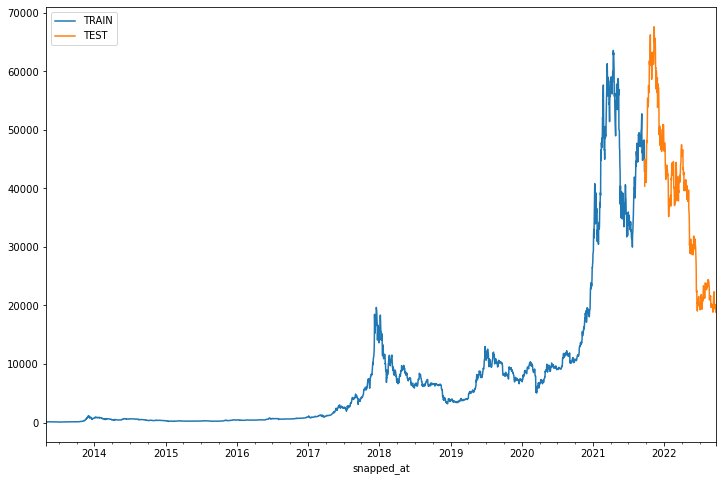

In [252]:
train_data['price'].plot(legend=True,label='TRAIN')
test_data['price'].plot(legend=True,label='TEST',figsize=(12,8));

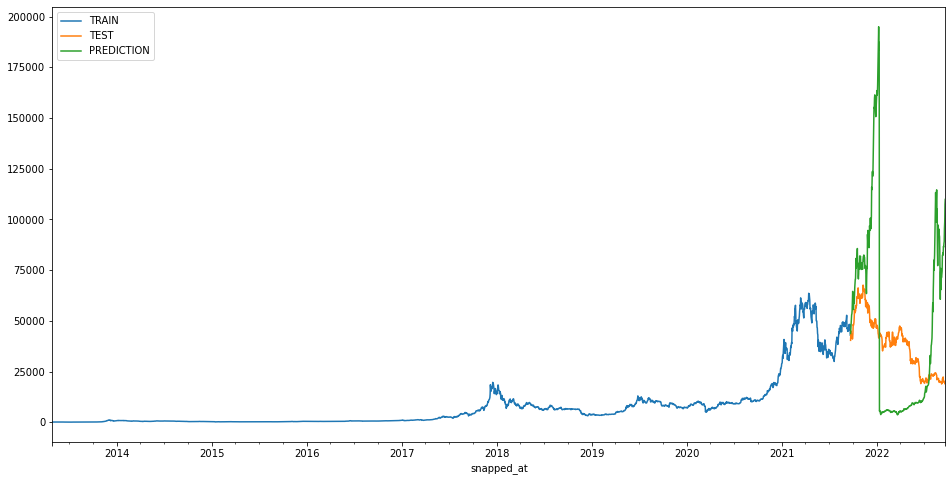

In [253]:
train_data['price'].plot(legend=True,label='TRAIN')
test_data['price'].plot(legend=True,label='TEST',figsize=(16,8))
test_predictions.plot(legend=True,label='PREDICTION');

In [254]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [255]:
mean_absolute_error(test_data,test_predictions)

36560.964497715

In [256]:
mean_squared_error(test_data,test_predictions)

2162503337.808737

In [257]:
np.sqrt(mean_squared_error(test_data,test_predictions))

46502.72398267371

In [258]:
test_data.describe()

,price
count,365.000000
mean,38428.184895
std,13492.088558
min,18859.500088
25%,23823.679442
50%,39699.024041
75%,46970.057051
max,67617.015545


In [259]:
# once we decide on the best parameters above for forecasting we run the actual forecast

In [262]:
final_model = ExponentialSmoothing(df['price'],trend='mul',seasonal='mul',seasonal_periods=1590).fit()

C:\Users\sagap\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [224]:
forecast_predictions = final_model.forecast(180).rename('180DayForecast')

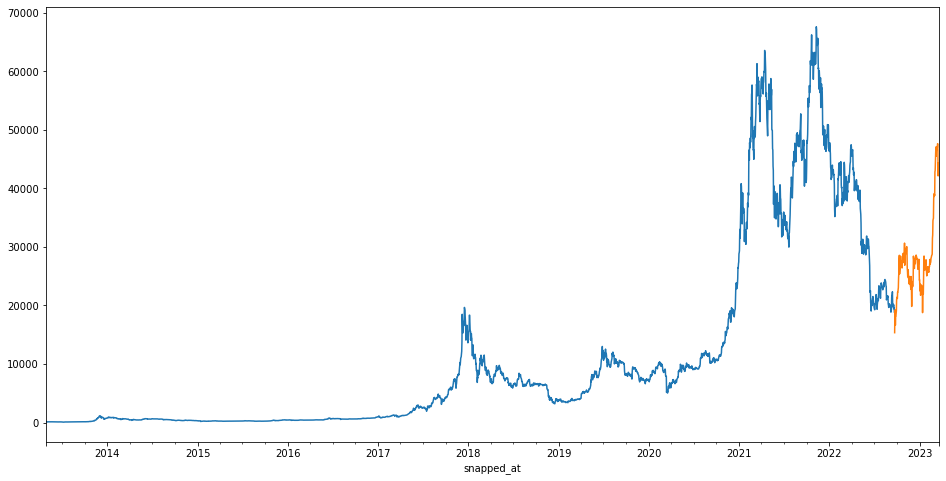

In [225]:
df['price'].plot(figsize=(16,8))
forecast_predictions.plot();

In [230]:
result = df.join(forecast_predictions, how='outer')
result[['price','180DayForecast']].iplot()